### Dataset

dowloaded with
```bash
wget https://raw.githubusercontent.com/alexeygrigorev/datasets/master/laptops.csv
```

loading into pandas

In [2]:
import pandas as pd

df = pd.read_csv("laptops.csv")

### Preparing the dataset

In [3]:
df.columns = df.columns.str.lower().str.replace(" ", "_")

### EDA (explorative data analysis)

* Look at the `final_price` variable. Does it have a long tail? 

In [4]:
df

,laptop,status,brand,model,cpu,ram,storage,storage_type,gpu,screen,touch,final_price
0,ASUS ExpertBook B1 B1502CBA-EJ0436X Intel Core...,New,Asus,ExpertBook,Intel Core i5,8,512,SSD,NaN,15.6,No,1009.00
1,Alurin Go Start Intel Celeron N4020/8GB/256GB ...,New,Alurin,Go,Intel Celeron,8,256,SSD,NaN,15.6,No,299.00
2,ASUS ExpertBook B1 B1502CBA-EJ0424X Intel Core...,New,Asus,ExpertBook,Intel Core i3,8,256,SSD,NaN,15.6,No,789.00
3,MSI Katana GF66 12UC-082XES Intel Core i7-1270...,New,MSI,Katana,Intel Core i7,16,1000,SSD,RTX 3050,15.6,No,1199.00
4,HP 15S-FQ5085NS Intel Core i5-1235U/16GB/512GB...,New,HP,15S,Intel Core i5,16,512,SSD,NaN,15.6,No,669.01
...,...,...,...,...,...,...,...,...,...,...,...,...
2155,Razer Blade 17 FHD 360Hz Intel Core i7-11800H/...,Refurbished,Razer,Blade,Intel Core i7,16,1000,SSD,RTX 3060,17.3,No,2699.99
2156,Razer Blade 17 FHD 360Hz Intel Core i7-11800H/...,Refurbished,Razer,Blade,Intel Core i7,16,1000,SSD,RTX 3070,17.3,No,2899.99
2157,Razer Blade 17 FHD 360Hz Intel Core i7-11800H/...,Refurbished,Razer,Blade,Intel Core i7,32,1000,SSD,RTX 3080,17.3,No,3399.99
2158,Razer Book 13 Intel Evo Core i7-1165G7/16GB/1T...,Refurbished,Razer,Book,Intel Evo Core i7,16,1000,SSD,NaN,13.4,Yes,1899.99


<Axes: xlabel='final_price', ylabel='Count'>

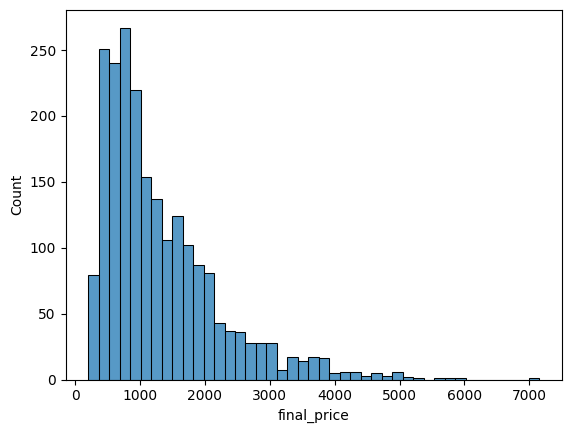

In [5]:
import seaborn as sns

sns.histplot(df.final_price)

apparently yes

### Question 1


There's one column with missing values. What is it?

* `'ram'`
* `'storage'`
* `'screen'`
* `'final_price'`

In [6]:
df.isnull().any()

laptop          False
status          False
brand           False
model           False
cpu             False
ram             False
storage         False
storage_type     True
gpu              True
screen           True
touch           False
final_price     False
dtype: bool

In [7]:
df["screen"].isnull().any()

np.True_

Answer: screen

### Question 2

What's the median (50% percentile) for variable `'ram'`?

- 8
- 16
- 24
- 32

In [8]:
df.ram.quantile(q=0.5)

np.float64(16.0)

### Prepare and split the dataset

* Shuffle the dataset (the filtered one you created above), use seed `42`.
* Split your data in train/val/test sets, with 60%/20%/20% distribution.

Use the same code as in the lectures

In [9]:
n = len(df)

n_val = int(n * 0.2)
n_test = int(n * 0.2)
n_train = n - n_val - n_test

In [10]:
import numpy as np

idx = np.arange(n)
np.random.seed(42)
np.random.shuffle(idx)

df_train = df.iloc[idx[:n_train]]
df_val = df.iloc[idx[n_train : n_train + n_val]]
df_test = df.iloc[idx[n_train + n_val :]]

df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

### Question 3

* We need to deal with missing values for the column from Q1.
* We have two options: fill it with 0 or with the mean of this variable.
* Try both options. For each, train a linear regression model without regularization using the code from the lessons.
* For computing the mean, use the training only!
* Use the validation dataset to evaluate the models and compare the RMSE of each option.
* Round the RMSE scores to 2 decimal digits using `round(score, 2)`
* Which option gives better RMSE?

Options:

- With 0
- With mean
- Both are equally good

In [11]:
def train_linear_regression(X, y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)

    print(XTX)

    XTX_inv = np.linalg.inv(XTX)

    print(XTX_inv)

    w_full = XTX_inv.dot(X.T).dot(y)

    return w_full[0], w_full[1:]

In [12]:
y_train = df_train.final_price.values
y_val = df_val.final_price.values
y_test = df_test.final_price.values

In [13]:
base = ["ram", "storage", "screen"]

mean_screen = df.screen.quantile(q=0.5)


def prepare_X(df, screen_fill):
    df = df[base].copy()

    df.screen = df.screen.fillna(screen_fill)
    X = df.values

    return X

In [14]:
X_train_zero = prepare_X(df_train, 0)
X_train_zero
w0_zero, w_zero = train_linear_regression(X_train_zero, y_train)

[[1.29600000e+03 2.03040000e+04 7.76436000e+05 1.96064500e+04]
 [2.03040000e+04 4.59512000e+05 1.60232640e+07 3.13496800e+05]
 [7.76436000e+05 1.60232640e+07 6.50713744e+08 1.19991336e+07]
 [1.96064500e+04 3.13496800e+05 1.19991336e+07 2.99268493e+05]]
[[ 9.16099825e-02  5.64546170e-05  4.08002664e-06 -6.22451649e-03]
 [ 5.64546170e-05  1.64858875e-05 -3.32467814e-07 -7.63803058e-06]
 [ 4.08002664e-06 -3.32467814e-07  1.28985979e-08 -4.36194404e-07]
 [-6.22451649e-03 -7.63803058e-06 -4.36194404e-07  4.36628405e-04]]


In [15]:
X_train_mean = prepare_X(df_train, mean_screen)
X_train_mean
w0_mean, w_mean = train_linear_regression(X_train_mean, y_train)

[[1.29600000e+03 2.03040000e+04 7.76436000e+05 1.96532500e+04]
 [2.03040000e+04 4.59512000e+05 1.60232640e+07 3.14120800e+05]
 [7.76436000e+05 1.60232640e+07 6.50713744e+08 1.20191016e+07]
 [1.96532500e+04 3.14120800e+05 1.20191016e+07 2.99998573e+05]]
[[ 1.29196532e-01  1.10398679e-04  6.11763958e-06 -8.82450461e-03]
 [ 1.10398679e-04  1.65621644e-05 -3.29456264e-07 -1.13748703e-05]
 [ 6.11763958e-06 -3.29456264e-07  1.30024133e-08 -5.76735283e-07]
 [-8.82450461e-03 -1.13748703e-05 -5.76735283e-07  6.16453329e-04]]


In [16]:
def rmse(y, y_pred):
    se = (y - y_pred) ** 2
    mse = se.mean()
    return np.sqrt(mse)

In [17]:
X_val_zero = prepare_X(df_val, 0)
y_pred_zero = w0_zero + X_val_zero.dot(w_zero)

X_val_mean = prepare_X(df_val, mean_screen)
y_pred_mean = w0_mean + X_val_zero.dot(w_mean)

score_zero = rmse(y_val, y_pred_zero).item()
score_mean = rmse(y_val, y_pred_mean).item()

print(f"The score for fillna(0): {score_zero:.2f}")
print(f"The score for fillna(mean): {score_mean:.2f}")

The score for fillna(0): 597.36
The score for fillna(mean): 597.73


### Question 4

* Now let's train a regularized linear regression.
* For this question, fill the NAs with 0. 
* Try different values of `r` from this list: `[0, 0.01, 0.1, 1, 5, 10, 100]`.
* Use RMSE to evaluate the model on the validation dataset.
* Round the RMSE scores to 2 decimal digits.
* Which `r` gives the best RMSE?

If there are multiple options, select the smallest `r`.

Options:

- 0
- 0.01
- 1
- 10
- 100

In [18]:
def train_linear_regression_reg(X, y, r):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX = XTX + r * np.eye(XTX.shape[0])

    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)

    return w_full[0], w_full[1:]


def prepare_X(df):
    df = df[base].copy()

    df = df.fillna(0)
    X = df.values

    return X

In [ ]:
rs = [0, 0.01, 0.1, 1, 5, 10, 100]

scores = {}
for r in rs:
    X_train = prepare_X(df_train)
    w0, w = train_linear_regression_reg(X_train, y_train, r)

    X_val = prepare_X(df_val)
    y_pred = w0 + X_val.dot(w)

    score = rmse(y_val, y_pred).item()

    scores[r] = round(score, 2)

scores_sorted = {k: v for k, v in sorted(scores.items(), key=lambda item: item[1])}
print(scores_sorted)

{5: 597.01, 10: 597.06, 1: 597.21, 0.1: 597.35, 0: 597.36, 0.01: 597.36, 100: 597.9}


### Question 5 

* We used seed 42 for splitting the data. Let's find out how selecting the seed influences our score.
* Try different seed values: `[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]`.
* For each seed, do the train/validation/test split with 60%/20%/20% distribution.
* Fill the missing values with 0 and train a model without regularization.
* For each seed, evaluate the model on the validation dataset and collect the RMSE scores. 
* What's the standard deviation of all the scores? To compute the standard deviation, use `np.std`.
* Round the result to 3 decimal digits (`round(std, 3)`)

What's the value of std?

- 19.176
- 29.176
- 39.176
- 49.176

> Note: Standard deviation shows how different the values are.
> If it's low, then all values are approximately the same.
> If it's high, the values are different. 
> If standard deviation of scores is low, then our model is *stable*.

In [3]:
import numpy as np
import pandas as pd

df = pd.read_csv("laptops.csv")
df.columns = df.columns.str.lower().str.replace(" ", "_")
n = len(df)

n_val = int(n * 0.2)
n_test = int(n * 0.2)
n_train = n - n_val - n_test


def prepare_X(df):
    base = ["ram", "storage", "screen"]
    df = df[base].copy()

    df = df.fillna(0)
    X = df.values

    return X


def train_linear_regression(X, y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)

    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)

    return w_full[0], w_full[1:]


def rmse(y, y_pred):
    se = (y - y_pred) ** 2
    mse = se.mean()
    return np.sqrt(mse)


seeds = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
scores = []
for seed in seeds:
    idx = np.arange(n)
    np.random.seed(seed)
    np.random.shuffle(idx)

    df_train = df.iloc[idx[:n_train]]
    df_val = df.iloc[idx[n_train : n_train + n_val]]
    df_test = df.iloc[idx[n_train + n_val :]]

    y_train = df_train.final_price.values
    y_val = df_val.final_price.values
    y_test = df_test.final_price.values

    X_train = prepare_X(df_train)
    w0, w = train_linear_regression(X_train, y_train)

    X_val = prepare_X(df_val)
    y_pred = w0 + X_val.dot(w)

    score = rmse(y_val, y_pred).item()

    scores.append(score)

round(np.std(np.array(scores)).item(), 3)

29.176

### Question 6

* Split the dataset like previously, use seed 9.
* Combine train and validation datasets.
* Fill the missing values with 0 and train a model with `r=0.001`. 
* What's the RMSE on the test dataset?

Options:

- 598.60
- 608.60
- 618.60
- 628.60

In [ ]:
import numpy as np
import pandas as pd

df = pd.read_csv("laptops.csv")
df.columns = df.columns.str.lower().str.replace(" ", "_")
n = len(df)

n_val = int(n * 0.2)
n_test = int(n * 0.2)
n_train = n - n_val - n_test

# split dataset with seed 9
idx = np.arange(n)
np.random.seed(9)
np.random.shuffle(idx)

df_train = df.iloc[idx[:n_train]]
df_val = df.iloc[idx[n_train : n_train + n_val]]
df_test = df.iloc[idx[n_train + n_val :]]

y_train = df_train.final_price.values
y_val = df_val.final_price.values
y_test = df_test.final_price.values

# combine train and validation datasets
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)
df_full_train = pd.concat([df_train, df_val])
df_full_train = df_full_train.reset_index(drop=True)


# use only the following columns:
# * `'ram'`,
# * `'storage'`,
# * `'screen'`,
# and fill missings with 0
def prepare_X(df):
    base = ["ram", "storage", "screen"]
    df = df[base].copy()

    df = df.fillna(0)
    X = df.values

    return X


# use regularization with r=0.001
def train_linear_regression_reg(X, y, r=0.001):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX = XTX + r * np.eye(XTX.shape[0])

    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)

    return w_full[0], w_full[1:]


X_full_train = prepare_X(df_full_train)
y_full_train = np.concatenate([y_train, y_val])
w0, w = train_linear_regression_reg(X_full_train, y_full_train)


def rmse(y, y_pred):
    se = (y - y_pred) ** 2
    mse = se.mean()
    return np.sqrt(mse)


X_test = prepare_X(df_test)
y_pred = w0 + X_test.dot(w)
score = rmse(y_test, y_pred)
score

np.float64(608.6099822049601)